[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

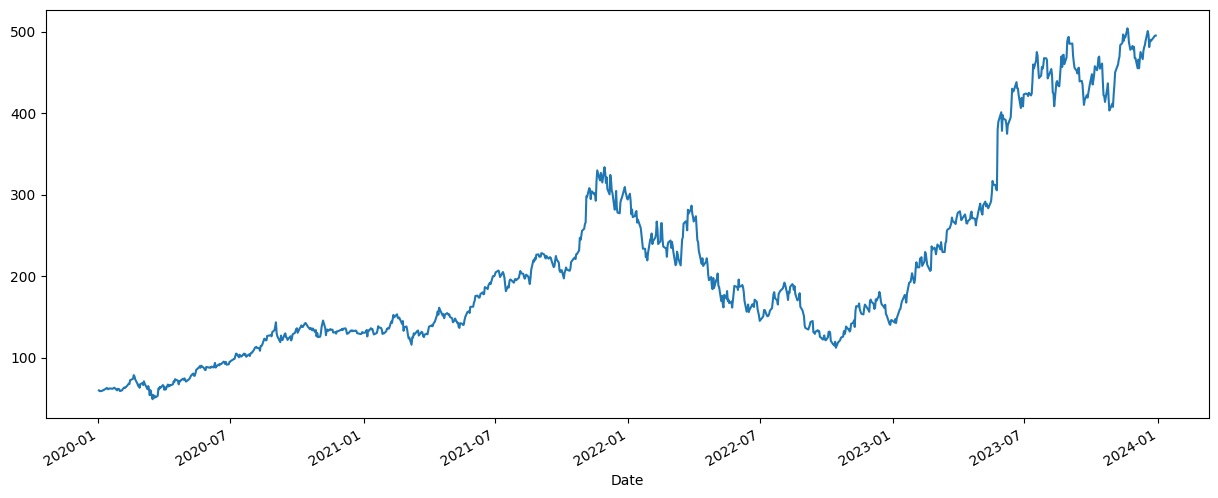

In [8]:
# This project's purpose is to predict NVIDIA's stock price for 2024 with Monte Carlo Simulation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Fetch historical data for NVIDIA
nvidia_data = yf.download('NVDA', start='2020-01-01', end='2023-12-31')['Close']

# Shows how stock has preformed in the last three years
nvidia_data.plot(figsize=(15,6))

In [9]:
# Calculate log returns from the closing prices
log_returns = np.log(nvidia_data / nvidia_data.shift())

# Calculate the mean and standard deviation of the log returns
mean_log_return = log_returns.mean()
std_dev_log_return = log_returns.std()

print("Mean of log return:", mean_log_return)
print("Standard deviation of the log return:",std_dev_log_return)

Mean of log return: 0.002100529953816315
Standard deviation of the log return: 0.03394364098526341


C:\Users\miikk\AppData\Local\Temp\ipykernel_876\1246168402.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = nvidia_data[-1]


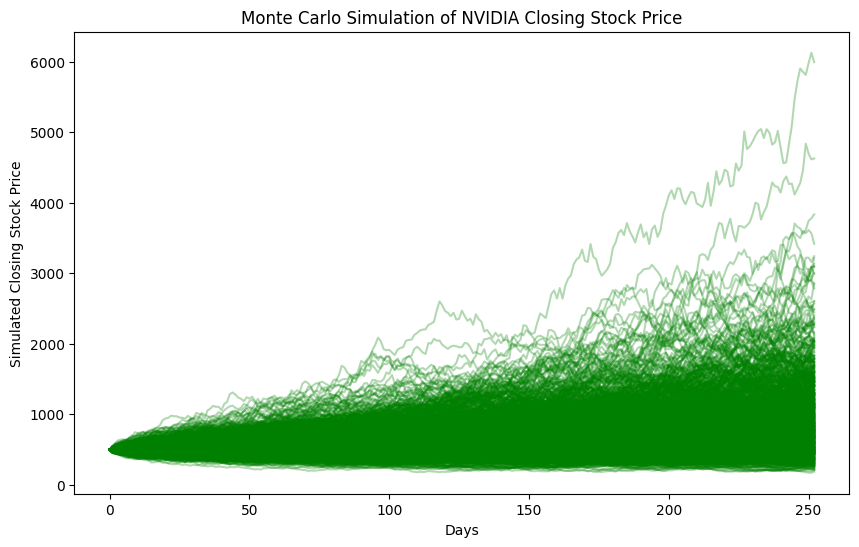

In [3]:
# 1000 Monte Carlo Simulation for 252 days (because commonly year have 252 trading days)
# Set up the Monte Carlo simulation parameters
num_simulations = 1000
num_days = 252  # Number of trading days in the future

# Save the last closing price
last_price = nvidia_data[-1]

# Create an array to hold the simulation results
simulation_results = np.zeros((num_days + 1, num_simulations))
simulation_results[0] = last_price

# Run the simulations
for i in range(num_simulations):
    # Generate random log returns for the number of days required
    random_log_returns = np.random.normal(mean_log_return, std_dev_log_return, num_days)
    # Convert log returns to simple returns and generate the price path
    price_series = np.exp(random_log_returns)
    simulation_results[1:, i] = last_price * np.cumprod(price_series)

# Plot the simulations
plt.figure(figsize=(10, 6))
plt.plot(simulation_results, color='green', alpha=0.3)  # Plot all the simulations in grey
plt.title('Monte Carlo Simulation of NVIDIA Closing Stock Price')
plt.xlabel('Days')
plt.ylabel('Simulated Closing Stock Price')
plt.show()

In [12]:
# Get the final day closing prices across all simulations
final_day_closing_prices = simulation_results[-1, :]

# Calculate the mean and standard deviation of the final day closing prices
mean_final_closing_price = np.mean(final_day_closing_prices)
std_dev_final_closing_price = np.std(final_day_closing_prices)
print(f"Mean of the simulated 2024-31-12 closing price: {mean_final_closing_price}")
print(f"Standard deviation of the simulated 2024-31-12 closing price: {std_dev_final_closing_price}")

Mean of the simulated 2024-31-12 closing price: 952.3697881881664
Standard deviation of the simulated 2024-31-12 closing price: 556.1262933116292


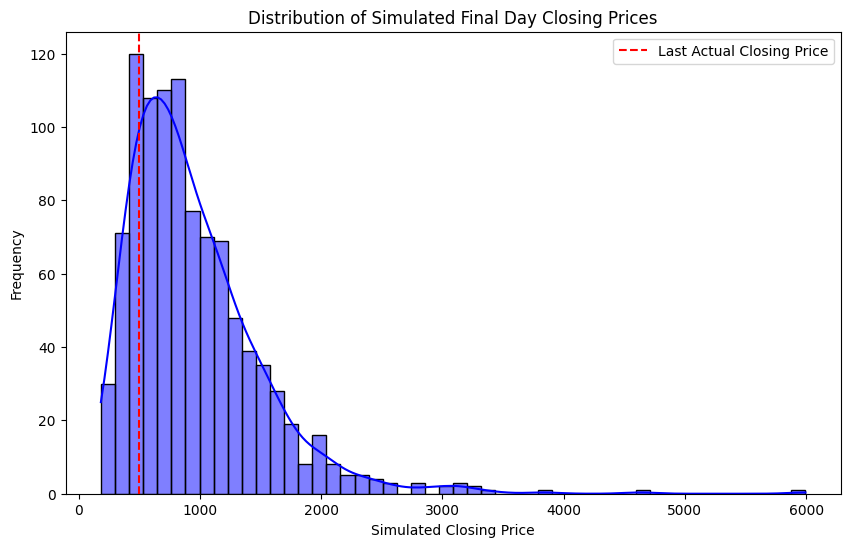

Probability of the simulated closing price being at or above the last actual closing price: 0.82


In [13]:
# Plot the distribution of the final day's closing prices
plt.figure(figsize=(10, 6))
sns.histplot(final_day_closing_prices, kde=True, color='blue', bins=50)
plt.title('Distribution of Simulated Final Day Closing Prices')
plt.xlabel('Simulated Closing Price')
plt.ylabel('Frequency')

plt.axvline(x=last_price, color='red', linestyle='--', label='Last Actual Closing Price')
plt.legend()

plt.show()

# Calculate the probability of the stock price being at or above the last actual closing price
prob_above_last_price = np.mean(final_day_closing_prices >= last_price)
print(f"Probability of the simulated closing price being at or above the last actual closing price: {prob_above_last_price:.2f}")